In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

2024-08-30 15:12:17.849791: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-30 15:12:19.136192: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### __Deep Learning workflow:__
<font size=3>
    
1. Import and data pre-processing;   
2. Neural network modeling;
3. Model compilation;
4. Train and validation;
5. Final training;
6. Test evaluation;
7. Saving the model.

### __1. Import and data pre-processing:__
<font size=3>
    
1.1 Import data;\
1.2 Data visualization;\
1.3 Feature engineering;\
1.4 Data shuffling;\
1.5 Train, validation, and test tensor divition.

Our first task will classify _normal_ and _abnormal_ orthopedic diagnoses from biomechanical features. Our data can be downloaded from the [Kaggle datasets](https://www.kaggle.com/datasets/uciml/biomechanical-features-of-orthopedic-patients?resource=download).

In [2]:
df = pd.read_csv("dataset/column_2C_weka.csv")

df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
# how many classes do we have?

n_normal = len(df[df['class'] == 'Normal'])
n_abnormal = len(df[df['class'] == 'Abnormal'])

n_normal, n_abnormal

(100, 210)

In [4]:
# data shuffling:
i = np.random.permutation(len(df))

df = df.iloc[i, :]

df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
134,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134,Abnormal
158,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145,Abnormal
26,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108,Abnormal
81,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166,Abnormal
241,51.529358,13.517847,35.000000,38.011510,126.718516,13.928331,Normal


In [5]:
# features data:
df.iloc[:, 0:6].head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
134,52.204693,17.212673,78.094969,34.992020,136.972517,54.939134
158,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145
26,26.147921,10.759454,14.000000,15.388468,125.203296,-10.093108
81,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166
241,51.529358,13.517847,35.000000,38.011510,126.718516,13.928331


In [6]:
x = df.iloc[:, 0:6].to_numpy()
x

array([[ 52.20469309,  17.21267289,  78.09496877,  34.9920202 ,
        136.9725168 ,  54.93913416],
       [ 57.03509717,   0.34572799,  49.19800263,  56.68936918,
        103.0486975 ,  52.16514503],
       [ 26.14792141,  10.75945357,  14.        ,  15.38846783,
        125.2032956 , -10.09310817],
       ...,
       [ 69.78100617,  13.77746531,  57.99999999,  56.00354085,
        118.9306656 ,  17.91456046],
       [118.1446548 ,  38.44950127,  50.83851954,  79.69515353,
         81.0245406 ,  74.04376736],
       [ 70.48410444,  12.48948765,  62.41714208,  57.99461679,
        114.1900488 ,  56.90244779]])

In [7]:
# target data:
df.iloc[:, -1:].head()

,class
134,Abnormal
158,Abnormal
26,Abnormal
81,Abnormal
241,Normal


In [8]:
def label_fn(x):
    if x == 'Abnormal': return 1.0
    else: return 0.0

y = df.iloc[:, -1].apply(label_fn).to_numpy()
y

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1.

In [9]:
x.shape, y.shape

((310, 6), (310,))

In [10]:
print("y:", y.shape)

# since x array has 2 dimensions, we'll expand y dimensions:
y = np.expand_dims(y, axis=1)

print("y:", y.shape)

y: (310,)
y: (310, 1)


In [11]:
# normalizing the data:
print(f"x before norm: max = {x.max():.2f}, min = {x.min():.2f}")

x /= abs(x).max() # normalization: x = x/max(abs(x))

print(f"x after norm: max = {x.max():.2f}, min = {x.min():.2f}")

x before norm: max = 418.54, min = -11.06
x after norm: max = 1.00, min = -0.03


In [12]:
# splitting the dataset into train, validation and test:
N_samples, N_features = x.shape

N_train = int(0.70*N_samples) # 80%

N_val = int(0.2*N_samples) # 20%

N_test = N_samples - (N_train + N_val) # 10%

print(f"N-samples = {N_samples}, N-train = {N_train}, N-val = {N_val}, N-test = {N_test}")

print(N_samples == N_train + N_val + N_test)

N-samples = 310, N-train = 217, N-val = 62, N-test = 31
True


In [13]:
x_train = x[:N_train]
y_train = y[:N_train]

x_val = x[N_train:N_train+N_val]
y_val = y[N_train:N_train+N_val]

x_test = x[N_train+N_val:]
y_test = y[N_train+N_val:]

print(f"x-train:{x_train.shape}, y-train:{y_train.shape}")
print(f"x-val:{x_val.shape}, y-val:{y_val.shape}")
print(f"x-test:{x_test.shape}, y-test:{y_test.shape}")

x-train:(217, 6), y-train:(217, 1)
x-val:(62, 6), y-val:(62, 1)
x-test:(31, 6), y-test:(31, 1)


In [14]:
# we can delete unnecessary tansors and dataframe:

del df, x, y

### __2. Neural network modeling:__
<font size=3>
    
2.1 Define initial layer's shape;\
2.2 Define output layer's shape and its [activation function](https://keras.io/api/layers/activations/);\
2.3 Define hidden layers.

[Checkout Keras API](https://keras.io/guides/functional_api/).

In [15]:
In = keras.Input(shape=(x_train.shape[1],))

x = keras.layers.Dense(50, activation='sigmoid')(In)

x = keras.layers.Dense(200, activation='sigmoid')(x)

x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(20, activation='sigmoid')(x)

Out = keras.layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=In, outputs=Out)

model.summary()

2024-08-30 15:12:21.589741: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │         4,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,591 (57.00 KB)

 Trainable params: 14,591 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

### __3. Model compilation:__
<font size=3>

3.1 Define [optimizer](https://keras.io/api/optimizers/);\
3.2 Define [loss function](https://keras.io/api/losses/);\
3.3 Define [validation metric](https://keras.io/api/metrics/).


In [16]:
model.compile(optimizer='SGD', loss="mse", metrics=['acc'])

### __4. Train and validation__
<font size=3>
    
Here, using the training data, the optimizer updates the values of the model's inner parameters (_i.e._, weights, biases, etc.) over the epochs while minimizing/maximizing the loss function. Meanwhile, the model's performance is measured for each epoch using the validation data. At this workflow stage, we model the neural network architecture to avoid [overfitting and underfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/).

__Underfitting__ means a poor NN fitting, _i.e._, the model does not learn well. On the other hand, __overfitting__ occurs when the model fits the training data very well but makes poor predictions with validation data.

__To avoid underfitting__, we need to make the NN more robust - with more layers and neurons - to increase the NN's depth.

__To avoid overfitting__, we have two basic options: __i)__ decrease the number of neurons (or/and layers) - as an analogy, we are decreasing the degree of a polynomial function (check the [figure](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/) again); __ii)__ we can apply a [dropout layer](https://keras.io/api/layers/regularization_layers/dropout/) after the layer with the largest number of neurons.

What is the dropout layer? Dropout _"closes"_ the activation of neurons from the previous layer at random by setting them to zero! When training becomes rigid, we create a type of _"neuroplasticity"_ in the network to form more flexible connections. Check the [paper](https://paperswithcode.com/method/dropout)'s motivation!


### __5. Final training__
<font size=3>

Once the modeling is completed, we concatenate train and validation data to fit again the model.

__Note:__ use the same number of epochs from the previous step.
    

In [ ]:
report = model.fit(x=np.concatenate([x_train, x_val]), 
                   y=np.concatenate([y_train, y_val]), 
                   epochs=20)


In [ ]:
report.history

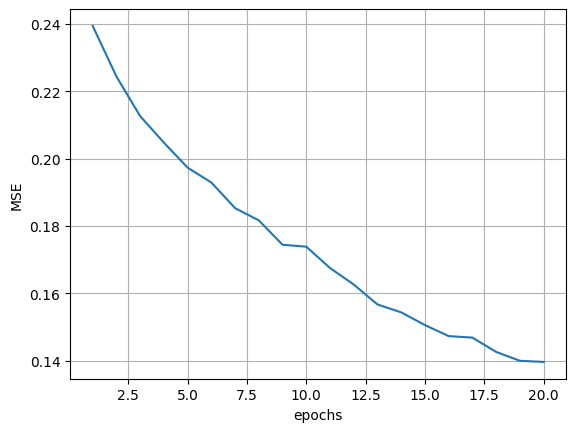

In [19]:
loss = report.history['loss']
epochs = np.linspace(1, len(loss), len(loss))

plt.plot(epochs, loss)
plt.ylabel('MSE')
plt.xlabel('epochs')
plt.grid()
plt.show()

### __6. Test evaluation__:

    6.1 Make the evaluation using the test data;
    6.1 Make some predictions to visualize the results;
   

In [20]:
model.evaluate(x=x_test, y=y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - acc: 0.8387 - loss: 0.1682


[0.16815292835235596, 0.8387096524238586]

### __7. Saving the model__:
<font size=3>
    
[Checkout](https://keras.io/api/models/model_saving_apis/).

In [22]:
# saving model's weights and bias:
model.save_weights("weights/model.weights.h5")

In [23]:
# saving (x, y)-test arrays for future evaluations:
np.save("dataset/x_test.npy", x_test)
np.save("dataset/y_test.npy", y_test)